# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [3]:
import numpy as np
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")
#mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [5]:
X.iloc[36000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 36000, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

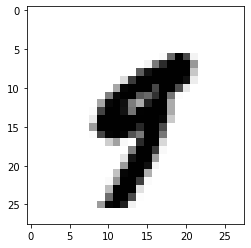

In [7]:
import matplotlib
import matplotlib.pyplot as plt

reshaped = X.iloc[36000].values.reshape(28, 28)

plt.imshow(reshaped, cmap=matplotlib.cm.binary, interpolation='nearest')


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [8]:
y.iloc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [14]:
# We do the train-test split

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 784) (60000,) (10000, 784) (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [16]:
# New y training and y testing set for number 5

y_train_5 = np.where(y_train == '5', 1, 0)

y_test_5 = np.where(y_test == '5',1, 0)

print(X_train.shape, y_train_5.shape, X_test.shape, y_test_5.shape)


(60000, 784) (60000,) (10000, 784) (10000,)


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [17]:
from sklearn.linear_model import LogisticRegression

Logistic_reg = LogisticRegression()
Logistic_reg.fit(X_train, y_train_5)


/Users/nadimsaad/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [20]:
predictions = Logistic_reg.predict(X_train) 
predictions[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [21]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()


### Now lets fit and predict on the testing set using our never 5 Classifier

In [22]:
never_5_clf.fit(X_train)

predictions_never_5 = never_5_clf.predict(X_train) 


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score

Predictions_ = Logistic_reg.predict(X_test)

print('Confusion matrix\n', confusion_matrix (y_test_5, Predictions_))
print('Precision:', precision_score (y_test_5, Predictions_))
print('Recall:', recall_score (y_test_5, Predictions_))
print('F1 score:', f1_score(y_test_5, Predictions_))
print('\n')

print('Never 5 model')
print('Confusion matrix:\n', confusion_matrix(y_train_5,predictions_never_5))
print('Precision:', precision_score(y_train_5,predictions_never_5))
print('Recall:', recall_score(y_train_5,predictions_never_5))
print('F1 score:', f1_score(y_train_5,predictions_never_5))


Confusion matrix
 [[9034   74]
 [ 147  745]]
Precision: 0.9096459096459096
Recall: 0.8352017937219731
F1 score: 0.8708357685563999


Never 5 model
Confusion matrix:
 [[54579     0]
 [ 5421     0]]
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Users/nadimsaad/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

No handles with labels found to put in legend.


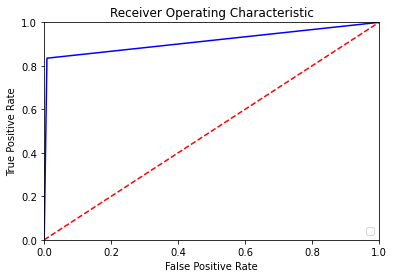

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

fpr, tpr, threshold = roc_curve(y_test_5, Predictions_)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [34]:
from sklearn.metrics import roc_auc_score

fpr2, tpr2, thresholds2 = roc_curve(y_train_5, predictions_never_5)  
auc2 = roc_auc_score(y_train_5, predictions_never_5)


### Now find the roc_auc_score for each. 

No handles with labels found to put in legend.


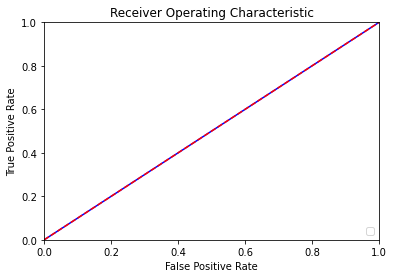

In [39]:
fpr, tpr, threshold = roc_curve(y_train_5, predictions_never_5)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
The first classifier is way above the line meaning it is quite accurate thus more effective